# Parameter tuning for Ridge and Lasso

In this notebook one can test different lambda values for the Ridge and Lasso gradients and train models with differnet number of polynomial degrees. The MSEs are plotted and saved to a figure. 

In [1]:
import sys
import os
# Add the project root to sys.path
sys.path.append(os.path.abspath('..'))

from Functions.gradientdescent_lib import *
from Functions.PLOT import plot
from Functions.bootstrap import *

c:\Users\maxfo\Python\Lib\site-packages\sklearn\utils\_param_validation.py:11: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.sparse import csr_matrix, issparse


In [2]:
np.random.seed(1)

n_points = 100

x_train, x_test, y_train, y_test = generateData(n_points, noise = 0.1)
x_train = x_train.flatten(); x_test = x_test.flatten()

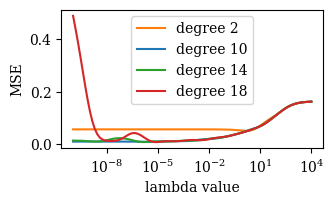

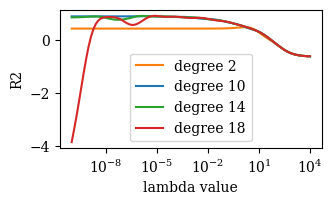

In [3]:
n_degrees = [2, 10,14, 18]
MSES = []
R2S = []
labels = []

for n_degree in n_degrees:

    noIntercept = False
    X_train = featureMat(x_train, n_degree, noIntercept=noIntercept)
    X_test = featureMat(x_test, n_degree, noIntercept=noIntercept)

    lambdas = np.logspace(-10, 4, 100)

    MSEs_test = np.zeros(len(lambdas), dtype=float)
    R2s_test = np.zeros(len(lambdas), dtype=float)

    for i, lambd in enumerate(lambdas):


        theta = theta_analytic_Ridge(X_train, y_train, lambd = lambd)
        y_test_pred = X_test @ theta

        MSE_test = MSE(y_test, y_test_pred)
        R2_test = R2(y_test, y_test_pred)

        MSEs_test[i] = MSE_test
        R2s_test[i] = R2_test


    MSES.append(MSEs_test)
    R2S.append(R2s_test)

    labels.append(f'degree {n_degree}')



plot(
    nGraphs = len(n_degrees),
    x_axis_array = lambdas,
    y_features = MSES,
    y_feature_label = labels,
    foldername = 'figures',
    figurename = f'Ridge_lambda_MSE',
    x_label = 'lambda value',
    y_label = 'MSE',
    title = '',
    x_integer_entries = False,
    y_integer_entries = False,
    save = True,
    scatter = None,
    multiX = False,
    y_logplot = False,
    x_logplot = True
)


plot(
    nGraphs = len(n_degrees),
    x_axis_array = lambdas,
    y_features = R2S,
    y_feature_label = labels,
    foldername = 'figures',
    figurename = f'Ridge_lambda_R2',
    x_label = 'lambda value',
    y_label = 'R2',
    title = '',
    x_integer_entries = False,
    y_integer_entries = False,
    save = True,
    scatter = None,
    multiX = False,
    y_logplot = False,
    x_logplot = True
    )